In [1]:
from optim.lr_scheduler import *
import matplotlib.pyplot as plt

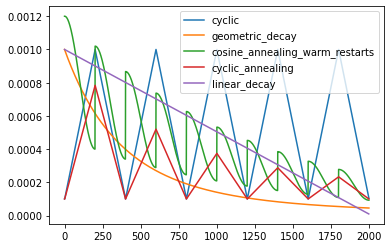

In [3]:
modes = ['cyclic', 'geometric_decay', 'cosine_annealing_warm_restarts', 'cyclic_annealing', 'linear_decay']

for i, mode in enumerate(modes):
    lrs = get_lrs(mode, n_epochs=2000)
    plt.plot(lrs)

plt.legend(modes)
plt.show()

## On RTRBM data

In [4]:
from boltzmann_machines.RTRBM import RTRBM
from boltzmann_machines.RTRBM_no_bias import RTRBM_nobias
from data.rtrbm_data import get_rtrbm_data

In [5]:
generated_rtrbm, data = get_rtrbm_data(device='cpu')

100%|██████████| 300/300 [00:58<00:00,  5.11it/s]


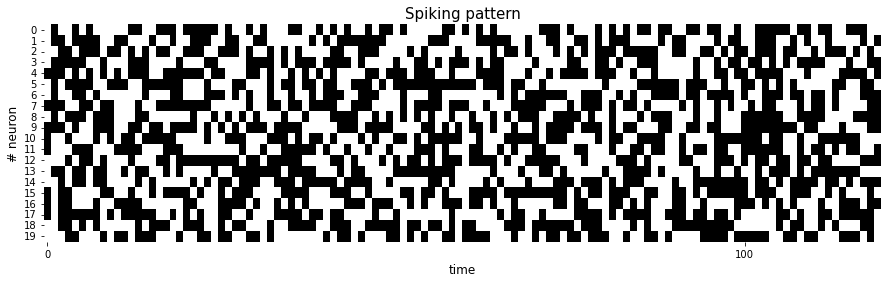

In [10]:
from utils.plots import raster_plot
raster_plot(torch.cat([data[:,:,0], data[:,:,1], data[:,:,2], data[:,:,3]], 1))
plt.show()

In [ ]:
for i, mode in enumerate(modes):
    rtrbm = RTRBM_nobias(data, N_H=generated_rtrbm.N_H, device='cpu')
    rtrbm.learn(n_epochs=2000, lr=1e-3, lr_end=1e-5, start_decay=200, batchsize=100, mom=0.9, wc=0.0002)

## On artificial data

## On Real zebrafish data